In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
iris = load_iris()
x = iris.data
y = iris.target
print("Feature names: ",iris.feature_names)
print("Target names: ",iris.target_names)
print("Shape of X: ",x.shape)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Shape of X:  (150, 4)


In [4]:
df = pd.DataFrame(x,columns = iris.feature_names)
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


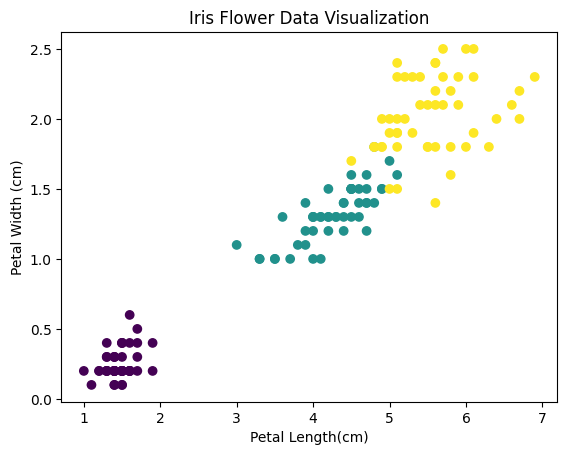

In [5]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'],c=y,cmap='viridis')
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Flower Data Visualization")
plt.show()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [7]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(n_estimators = 100)
}

for name, model in models.items():
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test,preds)
    print(f"{name} Accuracy: {acc*100:.2f}%")

Logistic Regression Accuracy: 96.67%
Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 96.67%


In [9]:
for name, model in models.items():
    preds = model.predict(x_test)
    print(name)
    print(confusion_matrix(y_test, preds))
    print("")


Logistic Regression
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Decision Tree
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Random Forest
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]



### Since all models perform nearly the same, I'll add some noise to make them behave different

In [10]:
x_noisy = x + np.random.normal(0,0.5,x.shape)
x_train,x_test,y_train,y_test = train_test_split(x_noisy,y,test_size = 0.2,random_state = 42)

### also limit features

In [11]:
x_small = df[['sepal length (cm)','sepal width (cm)']].values

In [12]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model,x,y,cv=5)
    print(f"{name}:{scores.mean()*100:.2f}%  ± {scores.std()*100:.2f}%")

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:97.33%  ± 2.49%
Decision Tree:96.67%  ± 3.65%
Random Forest:96.00%  ± 2.49%


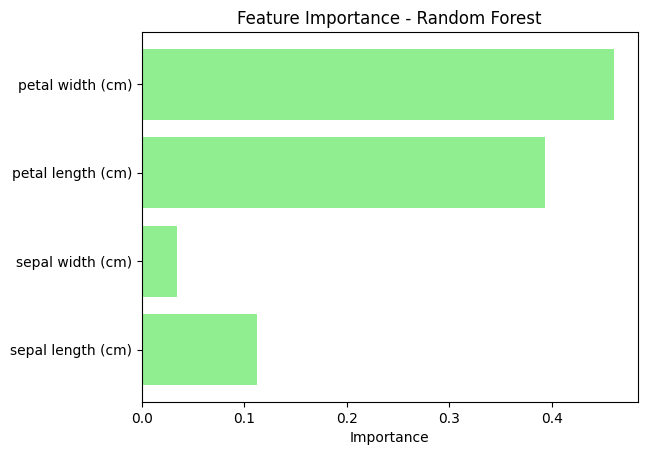

In [17]:
import matplotlib.pyplot as plt

importances = models["Random Forest"].feature_importances_
plt.barh(iris.feature_names, importances, color="lightgreen")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()


In [14]:
print("Final Summary:")
print("Logistic Regression performed best with 97.33% ± 2.49% accuracy.")
print("Petal length and width were most informative features.")


Final Summary:
Logistic Regression performed best with 97.33% ± 2.49% accuracy.
Petal length and width were most informative features.
